In [1]:
import numpy as np 
import pandas as pd 
import pickle
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('E:\dataset\weatherAUS.csv')

In [4]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
dataset.shape

(142193, 24)

In [7]:
dataset.drop(labels = ['Date','Location'],axis = 1,inplace = True)

In [8]:
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [9]:
dataset['RainToday'].replace({'No':0,'Yes':1},inplace = True)
dataset['RainTomorrow'].replace({'No':0,'Yes':1},inplace = True)
dataset.shape

(142193, 22)

In [10]:
dataset.shape

(142193, 22)

In [11]:
dataset.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'], axis =1 , inplace = True)

In [12]:
for i in dataset:
    if dataset[i].isnull().sum()!=0:
        dataset[i].fillna(dataset[i].median(), inplace = True)

In [13]:
dataset.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [14]:
dataset.head(25)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,0.0,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,0.0,0
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,0.0,0
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0,1.0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0
5,14.6,29.7,0.2,4.8,8.5,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0.0,0.0,0
6,14.3,25.0,0.0,4.8,8.5,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,0.0,0.0,0
7,7.7,26.7,0.0,4.8,8.5,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0.0,0.0,0
8,9.7,31.9,0.0,4.8,8.5,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,0.0,1.4,1
9,13.1,30.1,1.4,4.8,8.5,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,1.0,0.0,0


In [15]:
dataset.shape

(142193, 19)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [18]:
x = dataset.drop(labels = ['RainTomorrow'],axis = 1)

In [19]:
x.shape

(142193, 18)

In [20]:
y = dataset['RainTomorrow']

In [21]:
x = sc.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=40)

In [23]:
import keras
from keras.models import Sequential,save_model
from keras.layers import Dense

Using TensorFlow backend.


In [24]:
classifier = Sequential()

In [25]:
classifier.add(Dense(units =30,kernel_initializer='uniform',activation = 'relu',input_dim = 18))
classifier.add(Dense(units = 30,kernel_initializer='uniform',activation = 'relu'))
classifier.add(Dense(units = 30,kernel_initializer='uniform',activation = 'relu'))
classifier.add(Dense(units = 1,activation='sigmoid',kernel_initializer='uniform'))

In [26]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [27]:
mod = classifier.fit(x_train,y_train,epochs = 15,batch_size=87,validation_data=(x_val, y_val))

Train on 91003 samples, validate on 22751 samples
Epoch 1/15
91003/91003 [==============================] - 2s 20us/step - loss: 0.1175 - accuracy: 0.9547 - val_loss: 0.0141 - val_accuracy: 0.9944
Epoch 2/15
91003/91003 [==============================] - 2s 19us/step - loss: 0.0123 - accuracy: 0.9953 - val_loss: 0.0071 - val_accuracy: 0.9978
Epoch 3/15
91003/91003 [==============================] - 2s 19us/step - loss: 0.0092 - accuracy: 0.9965 - val_loss: 0.0093 - val_accuracy: 0.9952
Epoch 4/15
91003/91003 [==============================] - 2s 19us/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0153 - val_accuracy: 0.9943
Epoch 5/15
91003/91003 [==============================] - 2s 18us/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.0041 - val_accuracy: 0.9985
Epoch 6/15
91003/91003 [==============================] - 2s 20us/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0022 - val_accuracy: 0.9999
Epoch 7/15
91003/91003 [==============================] - 2s 20us/st

In [28]:
y_pred = classifier.predict_classes(x_test)
y_train_pred = classifier.predict_classes(x_train)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print('Training Accuracy ---->',accuracy_score(y_train,y_train_pred))
print('Testing Accuracy  ---->',accuracy_score(y_test,y_pred))

Training Accuracy ----> 0.9990879421557531
Testing Accuracy  ----> 0.9991912514504729


In [31]:
print(mod.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


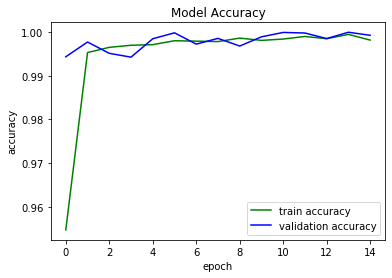

In [32]:
plt.plot(mod.history['accuracy'],'g',label='train accuracy')
plt.plot(mod.history['val_accuracy'],'b',label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

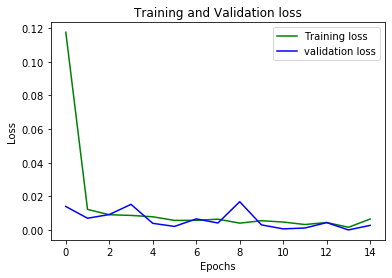

In [33]:
loss_train = mod.history['loss']
loss_val = mod.history['val_loss']
plt.plot( loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
import itertools


In [35]:
cm = confusion_matrix(y_test, y_pred)

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[21972    16]
 [    7  6444]]


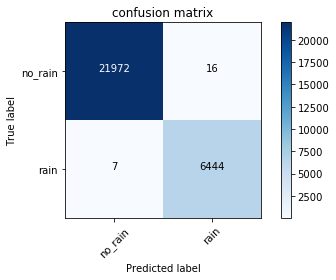

In [37]:
cm_plot_labels = ['no_rain', 'rain']
plot_confusion_matrix(cm, cm_plot_labels, title = 'confusion matrix')

In [38]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))


Precision: 0.9975232198142415
Recall: 0.998914896915207


In [39]:

print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.998218573309581
